# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [1]:
# Import our libraries 
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
# Read data into a dataframe
data = pd.read_csv('datasets/data.csv')
data.shape

(6819, 96)

In [3]:
print(data.columns)

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [4]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

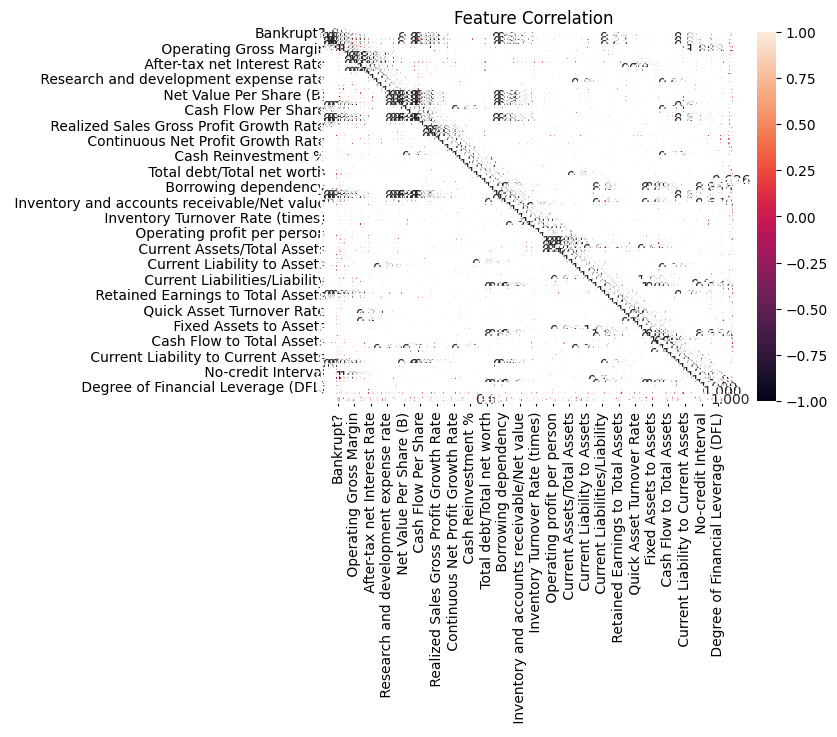

In [6]:
sns.heatmap(data.corr(), annot=True, fmt=".3f")
plt.title("Feature Correlation")
plt.show()


In [7]:
# Separate features and target variables
y = data['Bankrupt?']
x = data.drop(columns='Bankrupt?', axis=1)

# Split the dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled =scaler.transform(x_test)



In [8]:
print(data.columns)

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

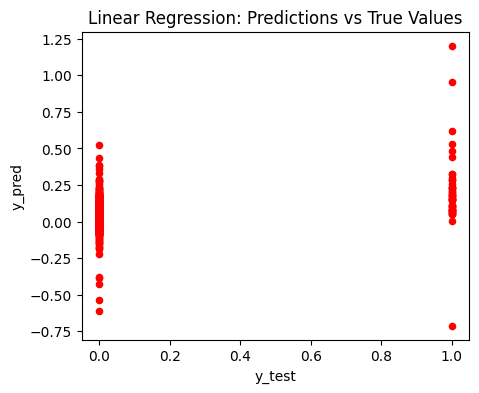


R2 (Linear Regression) = 0.114
R2 (Ridge) = 0.113
R2 (Lasso) = 0.133


In [9]:
# 1. Linear Regression
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

# Checking the prediction and y values
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred, s=20, c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Linear Regression: Predictions vs True Values')
plt.show()

# Calculate R2 score
r2 = model.score(x_test_scaled, y_test)
print('\nR2 (Linear Regression) = {:.3f}'.format(r2))

# Ridge regularization 
model = Ridge(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Ridge) = {:.3f}'.format(r2))

# Lasso Regularization
model = Lasso(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Lasso) = {:.3f}'.format(r2))


In [10]:
# Read data into a dataframe
data =  pd.read_csv('datasets/data.csv')

# Separate the features (x) and the target variable (y)
y = data['Bankrupt?']
x = data.drop(columns='Bankrupt?')

# Split the dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the trainig data and transform it
x_train_scaled = scaler.fit_transform(x_train)
# Transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)

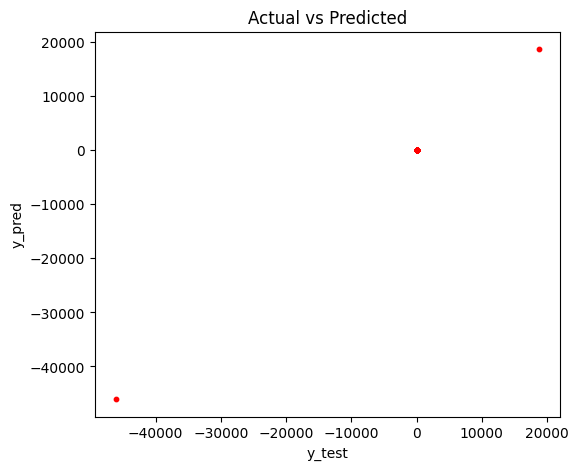


R2 (Locally Weighted Rregression) = -32968881.652


In [11]:
# train: training data, test: test data point to be predicted
def get_weight(train, test, tau):
    d2 = np.sum(np.square(train - test), axis=1)
    w = np.exp(-d2 / (2. * tau * tau))
    if np.sum(w) == 0:
        w += 1e-10
    return w 

y_pred = []
for tx in x_test_scaled:
    weight = get_weight(x_train_scaled, tx, 50.0) # we set tau = 50.0
    model = Ridge(alpha=0.01)
    model.fit(x_train_scaled, y_train, sample_weight= weight)
    y_pred.append(model.predict(tx.reshape(1,-1))[0])

y_pred = np.array(y_pred).reshape(-1,)

# Visually check the actual and predicted y values of the test data.
plt.figure(figsize=(6,5))
plt.scatter(y_pred, y_pred, s=10, c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Actual vs Predicted')
plt.show()

print('\nR2 (Locally Weighted Rregression) = {:.3f}'.format(r2_score(y_test, y_pred)))

In [12]:
# Regularization constant (strength)
REG_CONST = 0.01

# Create a model and fit it to the training data.
# C := inverse of regularization strength 
model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_train_scaled, y_train)

#Predict the classes of test data and measure the accuracy of test data
y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean()
print('\nAccuracy of test data = {:.3f}'.format(acc))


Accuracy of test data = 0.962


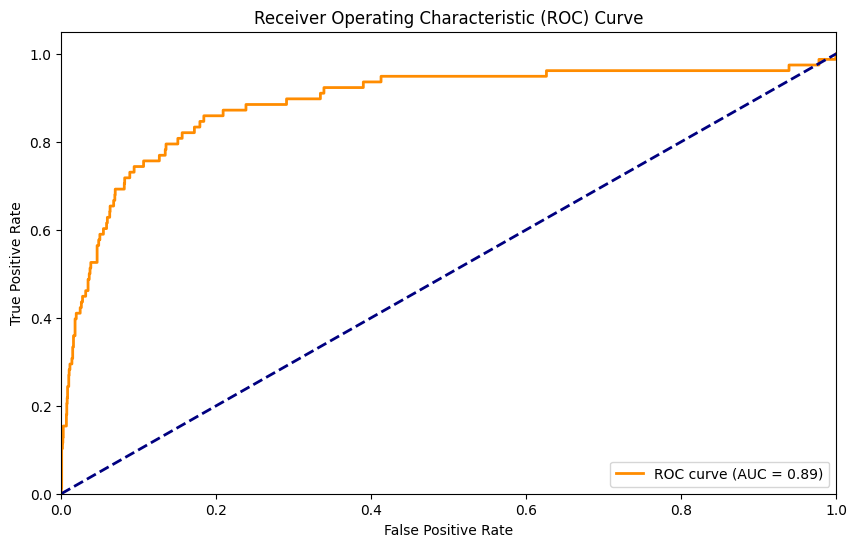

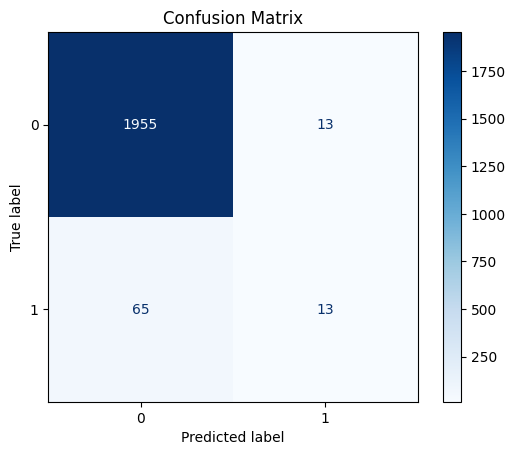

AUC Score: 0.888
F1 Score: 0.250

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.50      0.17      0.25        78

    accuracy                           0.96      2046
   macro avg       0.73      0.58      0.62      2046
weighted avg       0.95      0.96      0.95      2046



In [13]:
# Get prediction proabilities
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [14]:
# Create a model and fit it to the training data.
# C := inverse of regularization strength 
model = LogisticRegression(multi_class='multinomial', penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_train_scaled, y_train)

# Predict the classes of test data and measure the accuracy of test data
y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean()
print('\nAccuracy of test data = {:.3f}'.format(acc))


Accuracy of test data = 0.961


c:\Desktop\coding\MYDAC-Curriculum\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


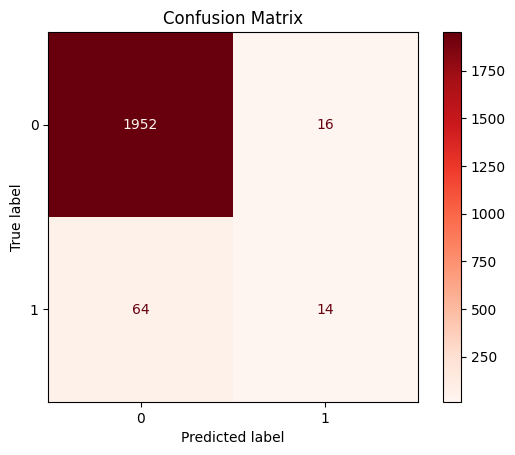

F1 Score: 0.952

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.47      0.18      0.26        78

    accuracy                           0.96      2046
   macro avg       0.72      0.59      0.62      2046
weighted avg       0.95      0.96      0.95      2046



In [15]:
# Get prediction proabilities
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Create and plote confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

CART

In [16]:
# Read Data into a Dataframe
df = pd.read_csv('datasets/data.csv')
df.shape

(6819, 96)

DecisionTreeClassifier: accuracy = 0.959


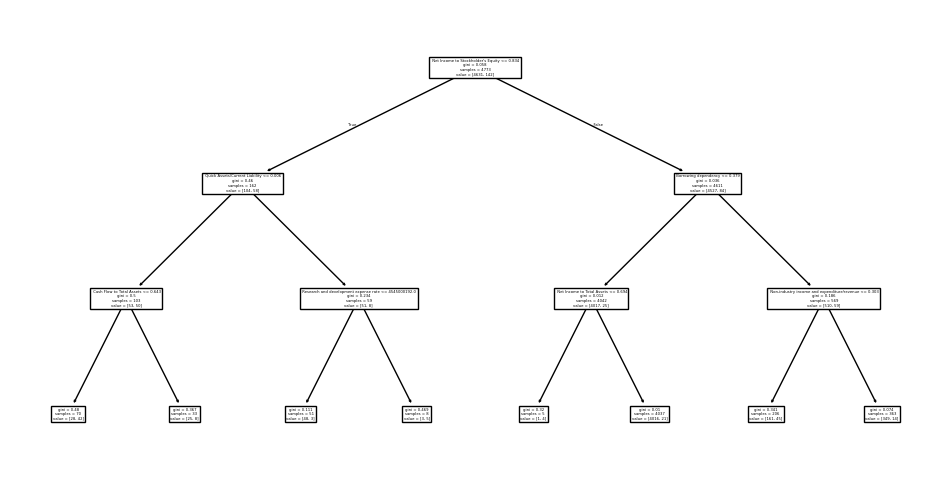

In [17]:
y = df['Bankrupt?']
x = df.drop("Bankrupt?",axis=1)
depth = 3

# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

sk_model = DecisionTreeClassifier(max_depth=depth)
sk_model.fit(x_train, y_train)
sk_pred = sk_model.predict(x_test)
acc = (y_test == sk_pred).mean()
print('DecisionTreeClassifier: accuracy = {:.3f}'.format(acc))

# Plotting
feature_names = x.columns.tolist()
plt.figure(figsize=(12,6))
tree.plot_tree(sk_model,
               feature_names=feature_names)
plt.show()

Depth = 1, train_acc = 0.9702, eval_acc = 0.9619
Depth = 2, train_acc = 0.9702, eval_acc = 0.9619
Depth = 3, train_acc = 0.9742, eval_acc = 0.9619
Depth = 4, train_acc = 0.9786, eval_acc = 0.9609
Depth = 5, train_acc = 0.9826, eval_acc = 0.9619
Depth = 6, train_acc = 0.9872, eval_acc = 0.9619
Depth = 7, train_acc = 0.9914, eval_acc = 0.9629
Depth = 8, train_acc = 0.9939, eval_acc = 0.9619

Optimal Depth: 7


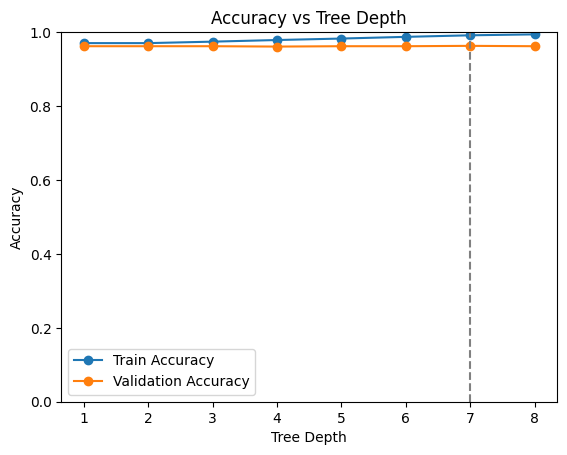

In [18]:
# Separate the data into features and target class
y = df['Bankrupt?']  # Target variable
x = df.drop("Bankrupt?", axis=1)  # Features

# Split the data into training, validation, and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

# Create decision tree models of various depths and measure accuracy
train_acc = []
eval_acc = []
max_depth = 8

for d in range(1, max_depth + 1):
    # Create and train a Decision Tree model with max depth `d`
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(x_train, y_train)

    # Measure the accuracy of this model using the training data
    y_pred_train = model.predict(x_train)  # Fixed variable name
    train_acc.append((y_pred_train == y_train).mean())  # Append training accuracy

    # Measure the accuracy of this model using the validation data
    y_pred_eval = model.predict(x_eval)  # Fixed variable name
    eval_acc.append((y_pred_eval == y_eval).mean())  # Append evaluation accuracy

    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest validation accuracy
opt_depth = np.argmax(eval_acc) + 1
print("\nOptimal Depth:", opt_depth)

# Visualize accuracy changes as depth changes
plt.plot(range(1, max_depth + 1), train_acc, marker='o', label='Train Accuracy')
plt.plot(range(1, max_depth + 1), eval_acc, marker='o', label='Validation Accuracy')
plt.legend()
plt.title('Accuracy vs Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(range(1, max_depth + 1))
plt.axvline(x=opt_depth, color='gray', linestyle='--', label='Optimal Depth')
plt.ylim(0, 1.0)  # Set y-axis limits
plt.show()


Optimal depth = 7, test_acc = 0.9570


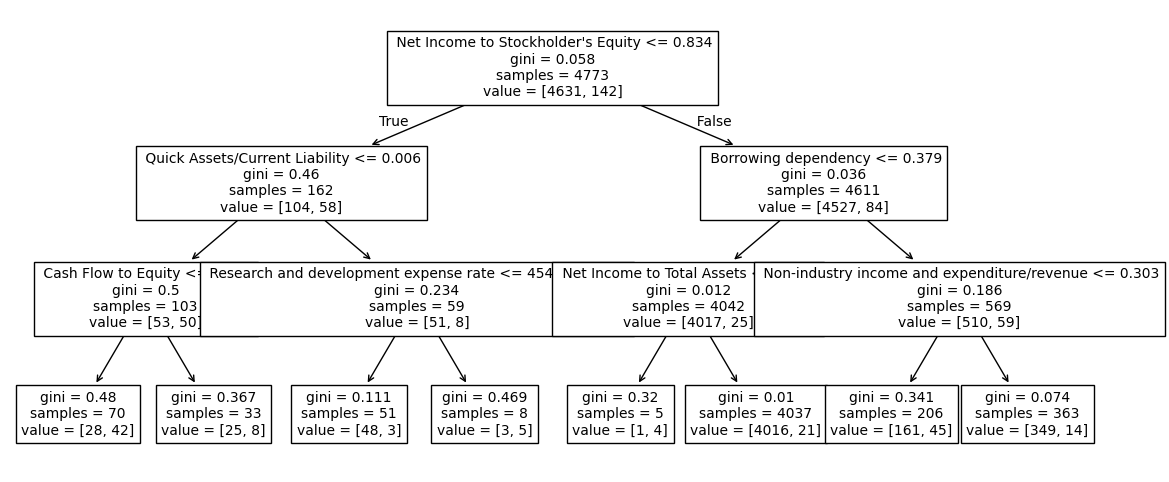

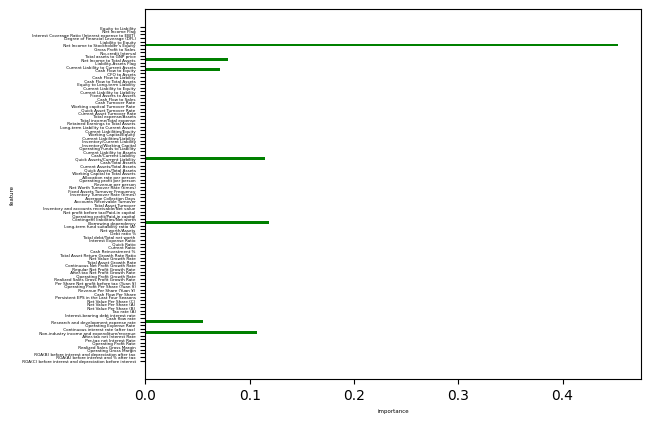

feature importance = [0.    0.    0.    0.    0.    0.    0.    0.    0.107 0.    0.    0.056
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.119 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.115 0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.072 0.
 0.    0.079 0.    0.    0.    0.453 0.    0.    0.    0.    0.   ]


In [19]:
# Setting max_step = 3 as a constant value for tree visualization
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

# Use test data to evaluate final performance.
y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))

# Visualize the tree
feat_names = x.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()

# Analyze the importance of features
feature_importance = model.feature_importances_
n_feature = x_train.shape[1]
idx = np.arange(n_feature)

plt.barh(idx, feature_importance, align='center', color='green')
plt.yticks(idx, feat_names, size=3)
plt.xlabel('importance', size=4)
plt.ylabel('feature', size=4)
plt.show()

print('feature importance = {}'.format(feature_importance.round(3)))

Pruning

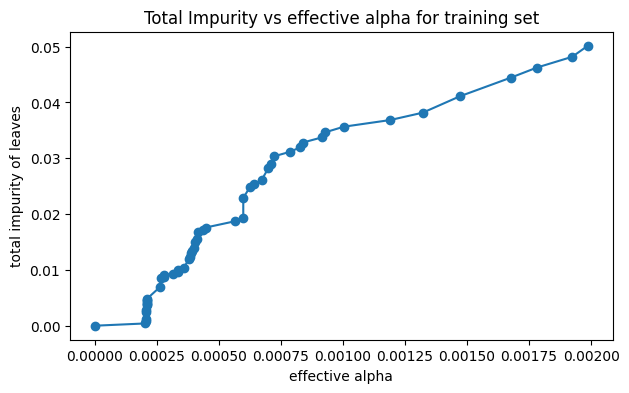

0 alpha = 0.0000 done.
1 alpha = 0.0002 done.
2 alpha = 0.0002 done.
3 alpha = 0.0002 done.
4 alpha = 0.0002 done.
5 alpha = 0.0002 done.
6 alpha = 0.0002 done.
7 alpha = 0.0002 done.
8 alpha = 0.0002 done.
9 alpha = 0.0002 done.
10 alpha = 0.0002 done.
11 alpha = 0.0002 done.
12 alpha = 0.0003 done.
13 alpha = 0.0003 done.
14 alpha = 0.0003 done.
15 alpha = 0.0003 done.
16 alpha = 0.0003 done.
17 alpha = 0.0003 done.
18 alpha = 0.0003 done.
19 alpha = 0.0004 done.
20 alpha = 0.0004 done.
21 alpha = 0.0004 done.
22 alpha = 0.0004 done.
23 alpha = 0.0004 done.
24 alpha = 0.0004 done.
25 alpha = 0.0004 done.
26 alpha = 0.0004 done.
27 alpha = 0.0004 done.
28 alpha = 0.0004 done.
29 alpha = 0.0004 done.
30 alpha = 0.0006 done.
31 alpha = 0.0006 done.
32 alpha = 0.0006 done.
33 alpha = 0.0006 done.
34 alpha = 0.0006 done.
35 alpha = 0.0007 done.
36 alpha = 0.0007 done.
37 alpha = 0.0007 done.
38 alpha = 0.0007 done.
39 alpha = 0.0008 done.
40 alpha = 0.0008 done.
41 alpha = 0.0008 done.
42

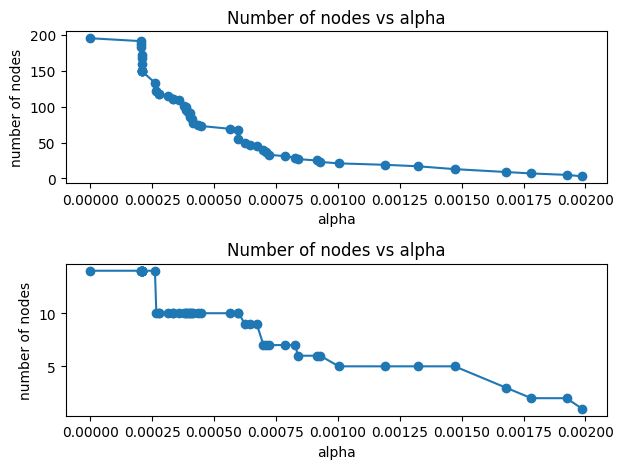

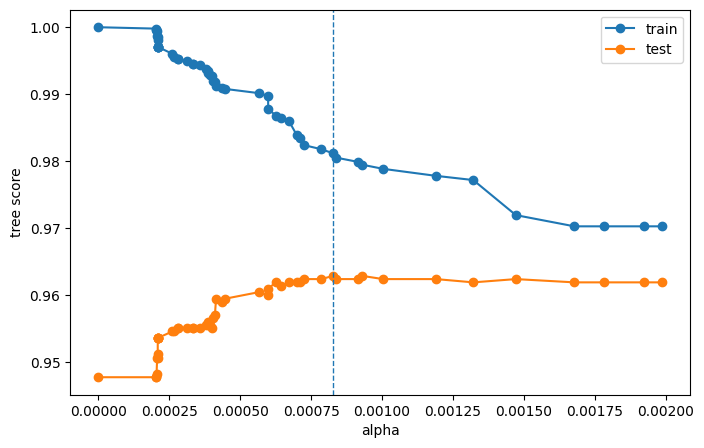

Accuracy of test data = 0.9629
Optimal alpha = 0.00082891


In [20]:
# Data into features and target class
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Apply Cost Complexity Purning (CCP) and get the alpha-star list.
model = DecisionTreeClassifier(random_state=42)
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha = path.ccp_alphas[:-1]
impurity = path.impurities[:-1]

plt.figure(figsize=(7,4))
plt.plot(ccp_alpha, impurity, marker="o")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

models = []
for i, alpha in enumerate(ccp_alpha):
    model = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    model.fit(x_train, y_train)
    models.append(model)
    print('%d alpha = %.4f done.' % (i, alpha))

node_counts = [model.tree_.node_count for model in models]
depth = [model.tree_.max_depth for model in models]

fig, ax = plt.subplots(2,1)
ax[0].plot(ccp_alpha, node_counts, marker="o")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alpha, depth, marker="o")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("number of nodes")
ax[1].set_title("Number of nodes vs alpha")
fig.tight_layout()

train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]


i_max = np.argmax(test_score)
opt_alpha = ccp_alpha[i_max]
opt_model = models[i_max]

plt.figure(figsize=(8,5))
plt.plot(ccp_alpha, train_score, marker='o', label='train')
plt.plot(ccp_alpha, test_score, marker='o', label='test')
plt.axvline(x=opt_alpha, ls='--', lw=1.0)
plt.legend()
plt.xlabel('alpha')
plt.ylabel('tree score')
plt.show()


print('Accuracy of test data = %.4f' % opt_model.score(x_test, y_test))
print('Optimal alpha = %.8f' % opt_alpha)

### Multiclass Classification


In [21]:
# Load in our dataset
iris = load_iris(as_frame=True)
x = iris.data
y = iris.target

# Generate training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y)

Accuracy of Model = 0.974


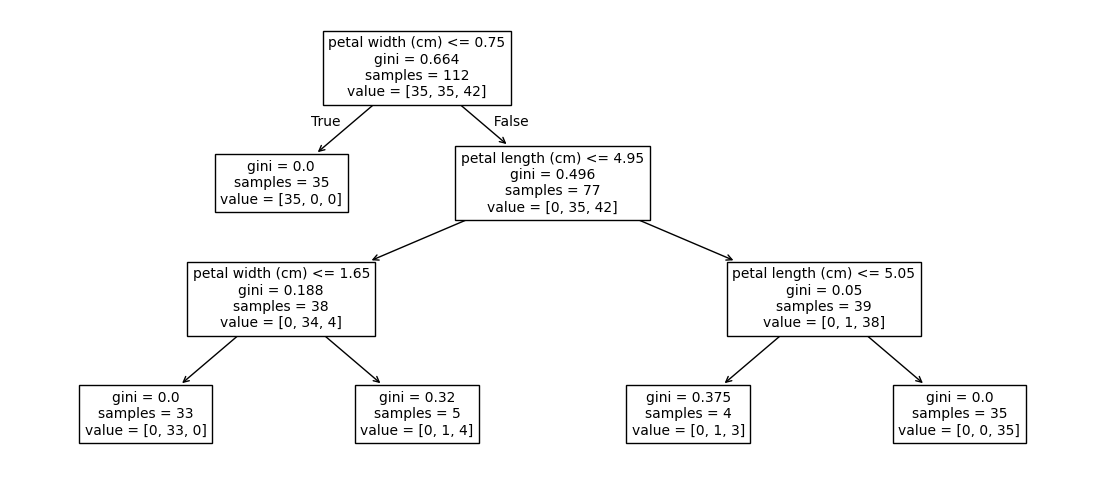

In [22]:
# Initize the DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

# Estimate the class of validation data
y_pred = model.predict(x_test)

# Measure the accuracy for validation data
accuracy = (y_test == y_pred).mean()
print('Accuracy of Model = {:.3f}'.format(accuracy))

feat_names = x.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()

### Regression Using Decision Trees

In [23]:
# Plot the training data and draw the estimated curve.
def plot_prediction(x, y, x_test, y_pred, title):
    plt.figure(figsize=(6,4))
    plt.scatter(x, y, c='Pink', s=20, alpha=0.5, label='train data')
    plt.plot(x_test, y_pred, c='green', lw=2.0, label='prediction')
    plt.xlim(0, 1)
    plt.ylim(0, 7)
    plt.legend()
    plt.title(title)
    plt.show()

# Generate nonlinear data for regression testing.
def noisy_sine_data(n, s):
    rtn_x, rtn_y = [], []
    for i in range(n):
        x= np.random.random()
        y= 2.0*np.sin(2.0*np.pi*x)+np.random.normal(0.0, s) + 3.0
        rtn_x.append(x)
        rtn_y.append(y)
    return np.array(rtn_x).reshape(-1,1), np.array(rtn_y)


# Create training and test data
x_train, y_train = noisy_sine_data(n=500, s=0.5)
x_test = np.linspace(0, 1, 50).reshape(-1,1)

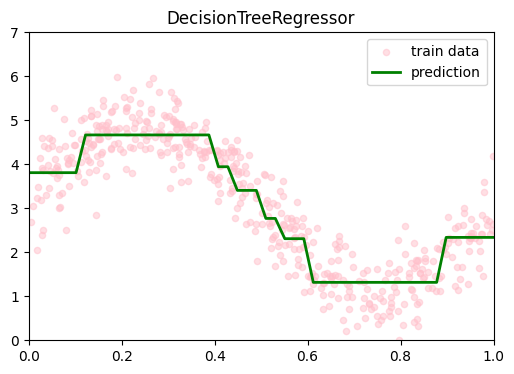

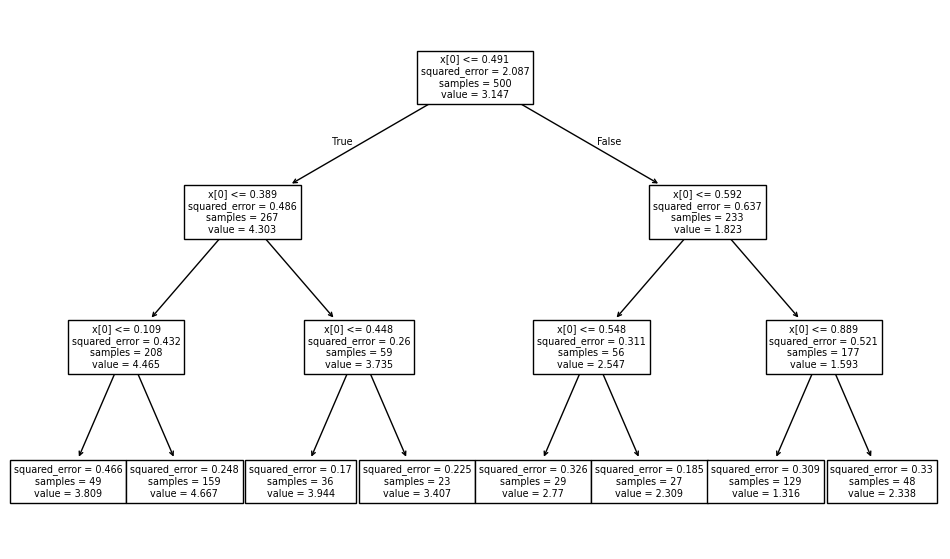

In [24]:
depth = 3

sk_model = DecisionTreeRegressor(max_depth= depth)
sk_model.fit(x_train, y_train)
sk_pred = sk_model.predict(x_test)

#Plotting training data and draw the estimated curve
plot_prediction(x_train, y_train, x_test, sk_pred, 'DecisionTreeRegressor')

plt.figure(figsize=(12,7))
tree.plot_tree(sk_model)
plt.show()